In [13]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import matplotlib as mpl

In [16]:
import datetime as dt

In [17]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [19]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query()
june_results = session.query(Measurement.date, Measurement.tobs).\
               filter(extract('month', Measurement.date)== 6)


In [20]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).\
               filter(extract('month', Measurement.date)== 6).all()
# print(june_results )

In [21]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame (june_results, columns=['date','June temp'])
print(june_df)

            date  June temp
0     2010-06-01       78.0
1     2010-06-02       76.0
2     2010-06-03       78.0
3     2010-06-04       76.0
4     2010-06-05       77.0
...          ...        ...
1695  2017-06-26       79.0
1696  2017-06-27       74.0
1697  2017-06-28       74.0
1698  2017-06-29       76.0
1699  2017-06-30       75.0

[1700 rows x 2 columns]


In [22]:
june_df = pd.DataFrame (june_results, columns=['date','June temp'])
june_df.set_index(june_df['date'], inplace=True)
# print(june_df.to_string(index=False))

In [23]:
# putting dates in order
june_df = june_df.sort_index()
# print(june_df.to_string(index=False))

In [24]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
print(june_df.describe().to_string(index=True))
# map("{:,.2f}".format)
june_df.describe()


         June temp
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.000000
max      85.000000


,June temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [25]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query()
dec_results = session.query(Measurement.date, Measurement.tobs).\
               filter(extract('month', Measurement.date)== 12)


In [26]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).\
               filter(extract('month', Measurement.date)== 12).all()
# print(dec_results )

In [27]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame (dec_results, columns=['date','Dec temp'])
print(dec_df)

            date  Dec temp
0     2010-12-01      76.0
1     2010-12-03      74.0
2     2010-12-04      74.0
3     2010-12-06      64.0
4     2010-12-07      64.0
...          ...       ...
1512  2016-12-27      71.0
1513  2016-12-28      71.0
1514  2016-12-29      69.0
1515  2016-12-30      65.0
1516  2016-12-31      65.0

[1517 rows x 2 columns]


In [28]:
# putting dates in order
dec_df = dec_df.sort_index()
# print(dec_df.to_string(index=False))

In [29]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
print(dec_df.describe().to_string(index=True))
dec_df.describe()


          Dec temp
count  1517.000000
mean     71.041529
std       3.745920
min      56.000000
25%      69.000000
50%      71.000000
75%      74.000000
max      83.000000


,Dec temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# performing 2 additional queries to check dec and june weather data

In [30]:
# Looking at both june and Dec data side by side
june_statistics = june_df.describe()
dec_statistics = dec_df.describe()

summary_df = june_statistics.merge(dec_statistics, left_index=True, right_index=True)
summary_df

,June temp,Dec temp
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


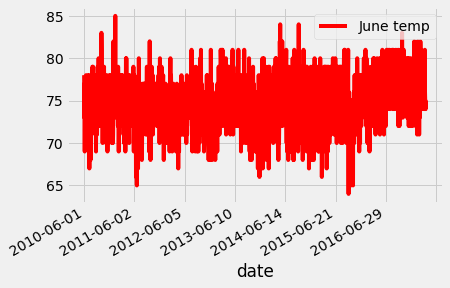

In [31]:
june_df.plot(x= 'date', y= 'June temp', color='r')
plt.gcf().autofmt_xdate()

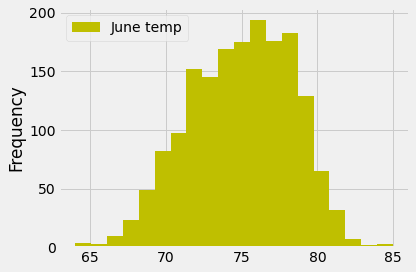

In [32]:
# since the above plot was not good trying histogram
june_df.plot.hist(bins=20, color= 'y')
plt.tight_layout()

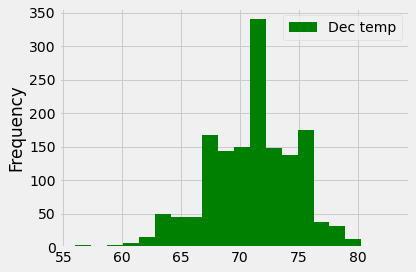

In [33]:
# similarly for dec
dec_df.plot.hist(bins=20, color = 'g')
plt.tight_layout()

In [34]:
# trying bar graph
# june_df.plot.bar(stacked=True)
# plt.tight_layout()
# did not produce a good graph

In [35]:
# query for station
session.query()
june_station = session.query(Measurement.station, Measurement.tobs).\
               filter(extract('month', Measurement.date)== 6).all()
# print(june_station)

In [36]:
junestation_df = pd.DataFrame (june_station, columns=['Station','June temp'])
print(junestation_df)

          Station  June temp
0     USC00519397       78.0
1     USC00519397       76.0
2     USC00519397       78.0
3     USC00519397       76.0
4     USC00519397       77.0
...           ...        ...
1695  USC00516128       79.0
1696  USC00516128       74.0
1697  USC00516128       74.0
1698  USC00516128       76.0
1699  USC00516128       75.0

[1700 rows x 2 columns]


In [37]:
session.query()
dec_station = session.query(Measurement.station, Measurement.tobs).\
               filter(extract('month', Measurement.date)== 12).all()
# print(dec_station)

In [38]:
decstation_df = pd.DataFrame (dec_station, columns=['Station','Dec temp'])
print(decstation_df)

          Station  Dec temp
0     USC00519397      76.0
1     USC00519397      74.0
2     USC00519397      74.0
3     USC00519397      64.0
4     USC00519397      64.0
...           ...       ...
1512  USC00516128      71.0
1513  USC00516128      71.0
1514  USC00516128      69.0
1515  USC00516128      65.0
1516  USC00516128      65.0

[1517 rows x 2 columns]


In [39]:
# merging both
station_temps = junestation_df.merge(decstation_df, on="Station", how="inner").set_index("Station")
station_temps

,June temp,Dec temp
Station,,
USC00519397,78.0,76.0
USC00519397,78.0,74.0
USC00519397,78.0,74.0
USC00519397,78.0,64.0
USC00519397,78.0,64.0
...,...,...
USC00516128,75.0,71.0
USC00516128,75.0,71.0
USC00516128,75.0,69.0
